In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/case-dataset/dictionary_games_category.csv
/kaggle/input/case-dataset/case_dataset.csv


In [3]:
data = pd.read_csv("../input/case-dataset/case_dataset.csv")
data.describe()

,Unnamed: 0,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,...,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
count,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,934251.000000,1.020898e+06,...,1.020898e+06,775201.000000,1.020898e+06,868431.000000,1.020898e+06,56262.000000,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06
mean,5.426444e+05,1.110879e+01,3.103372e+01,1.475691e+00,1.492424e+02,1.900231e+01,2.465287e+03,1.649066e+01,824.902671,7.030948e+00,...,7.282587e+00,1080.990825,1.228411e+01,389.946668,3.049648e-01,1124.346348,2.363958e-01,5.220557e-02,4.659834e+00,8.167330e+00
std,3.131579e+05,3.871220e+01,1.736320e+01,5.002438e-01,4.657268e+02,1.101728e+01,3.670053e+03,1.181452e+01,1317.074512,9.130400e+00,...,8.308504e+00,2622.306000,1.131563e+01,1073.695139,2.382813e+00,2747.938094,1.724557e+01,1.095166e+00,1.911437e+01,7.434304e+00
min,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.714072e+05,1.000000e+00,1.800000e+01,1.000000e+00,4.000000e+00,8.000000e+00,2.691650e+02,4.000000e+00,59.040000,0.000000e+00,...,1.000000e+00,37.310000,1.000000e+00,28.167000,0.000000e+00,9.840000,0.000000e+00,0.000000e+00,1.146732e-02,0.000000e+00
50%,5.428815e+05,1.000000e+00,2.800000e+01,1.000000e+00,5.100000e+01,2.300000e+01,1.069975e+03,1.800000e+01,282.900000,2.000000e+00,...,4.000000e+00,167.192143,8.000000e+00,93.357000,0.000000e+00,88.560000,0.000000e+00,0.000000e+00,8.622609e-01,7.000000e+00
75%,8.140248e+05,1.000000e+00,3.900000e+01,2.000000e+00,1.480000e+02,3.000000e+01,3.191799e+03,2.900000e+01,1044.743077,1.200000e+01,...,1.200000e+01,824.100000,2.400000e+01,296.635000,0.000000e+00,927.420000,0.000000e+00,0.000000e+00,5.498382e+00,1.300000e+01
max,1.084533e+06,2.320000e+02,1.190000e+02,2.000000e+00,1.000000e+04,3.000000e+01,1.026687e+05,3.000000e+01,40278.728000,3.000000e+01,...,3.000000e+01,146057.580000,3.000000e+01,60114.446000,3.000000e+01,57211.482000,8.658889e+03,2.550108e+02,8.392882e+03,2.500000e+01


Text(0, 0.5, 'games')

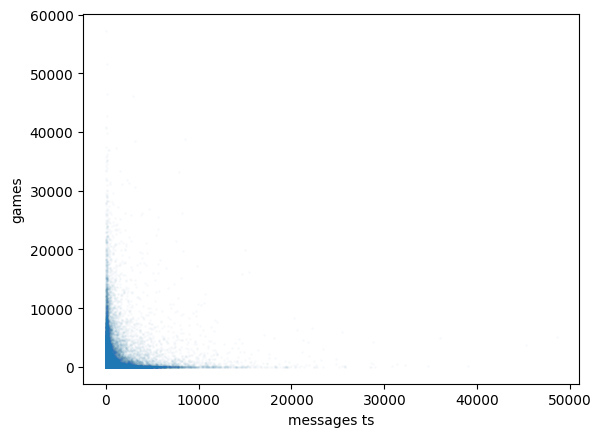

In [116]:
plt.plot(data['avg_daily_ts_messages'], data['avg_daily_ts_games'], 'o',
         alpha=0.02, markersize=1)

plt.xlabel('messages ts')
plt.ylabel('games')

чистка данных

In [4]:
relevant_columns = ['friends', 'days_in_vk', 'avg_daily_ts', 'avg_daily_ts_messages']
filtered_df = data.copy()
filtered_df = filtered_df[(filtered_df['friends'] >= 20) & (filtered_df['avg_daily_ts'] > 0)]
for column in relevant_columns:
    filtered_df[column] = filtered_df[column].fillna(filtered_df[column].median())
    
for column in relevant_columns:
    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5* IQR  # Интервал увеличен
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]


for column in relevant_columns:
    filtered_df[column] = filtered_df[column].fillna(filtered_df[column].median())
    
filtered_df = filtered_df.drop_duplicates()
filtered_df.shape

deleted_rows = int(data.shape[0]) - int(filtered_df.shape[0])
print(deleted_rows)


523197


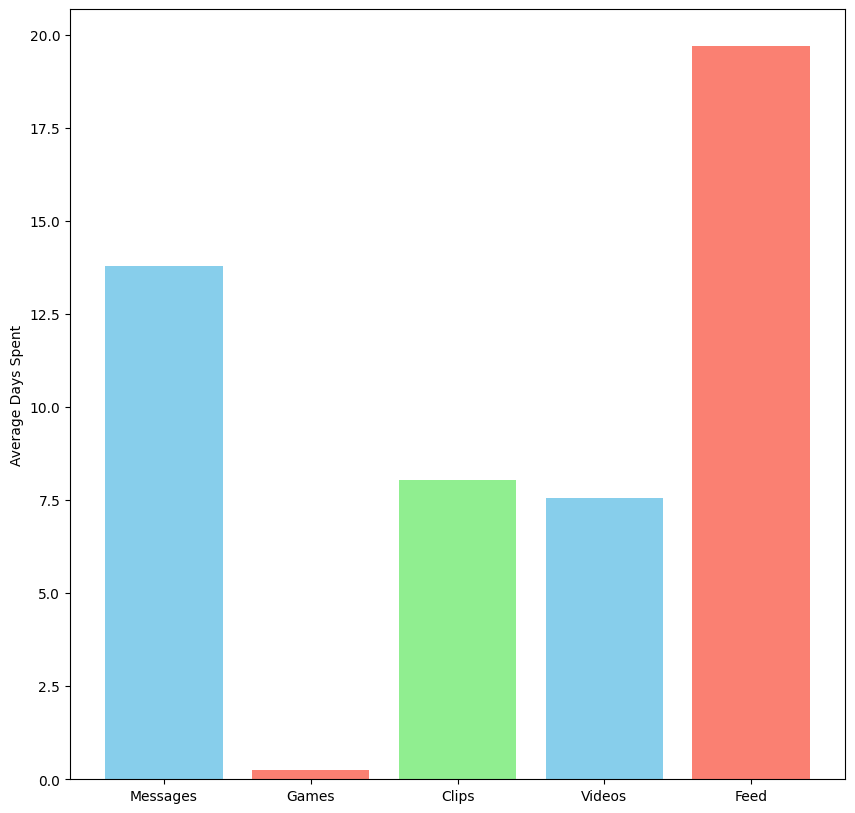

In [7]:
sums = {
    'Messages': filtered_df['days_in_messages'].mean(),
    'Games': filtered_df['days_in_games'].mean(),
    'Clips': filtered_df['days_in_clips'].mean(),
    'Videos': filtered_df['days_in_video'].mean(),
    'Feed': filtered_df['days_in_feed'].mean(),
}

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 10))
plt.bar(sums.keys(), sums.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel("Average Days Spent")
plt.show()

In [39]:
print(filtered_df['avg_daily_ts_games'].mean())

809.121409835872


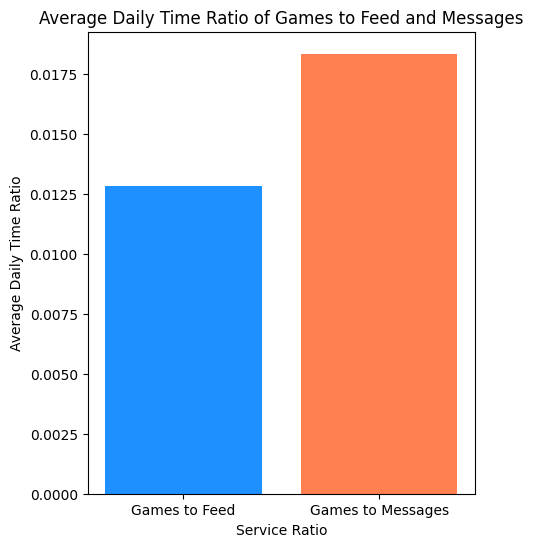

In [44]:
ratio_feed = (filtered_df['days_in_games'].mean() / filtered_df['days_in_feed'].mean())
ratio_messages = (filtered_df['days_in_games'].mean() / filtered_df['days_in_messages'].mean())

# Создаем словарь с рассчитанными значениями
ratios = {
    'Games to Feed': ratio_feed,
    'Games to Messages': ratio_messages
}

# Построение столбчатой диаграммы
plt.figure(figsize=(5, 6))
plt.bar(ratios.keys(), ratios.values(), color=['dodgerblue', 'coral'])
plt.xlabel("Service Ratio")
plt.ylabel("Average Daily Time Ratio")
plt.title("Average Daily Time Ratio of Games to Feed and Messages")
plt.show()

In [104]:
df.describe()

,Unnamed: 0,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,...,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
count,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,934251.000000,1.020898e+06,...,1.020898e+06,775201.000000,1.020898e+06,1.020898e+06,1.020898e+06,56262.000000,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06
mean,5.426444e+05,1.110879e+01,3.103372e+01,1.475691e+00,1.492424e+02,1.900231e+01,2.465287e+03,1.649066e+01,824.902671,7.030948e+00,...,7.282587e+00,1080.990825,1.228411e+01,3.456522e+02,3.049648e-01,1124.346348,2.363958e-01,5.220557e-02,4.659834e+00,8.167330e+00
std,3.131579e+05,3.871220e+01,1.736320e+01,5.002438e-01,4.657268e+02,1.101728e+01,3.670053e+03,1.181452e+01,1317.074512,9.130400e+00,...,8.308504e+00,2622.306000,1.131563e+01,9.959052e+02,2.382813e+00,2747.938094,1.724557e+01,1.095166e+00,1.911437e+01,7.434304e+00
min,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.714072e+05,1.000000e+00,1.800000e+01,1.000000e+00,4.000000e+00,8.000000e+00,2.691650e+02,4.000000e+00,59.040000,0.000000e+00,...,1.000000e+00,37.310000,1.000000e+00,3.573833e+01,0.000000e+00,9.840000,0.000000e+00,0.000000e+00,1.146732e-02,0.000000e+00
50%,5.428815e+05,1.000000e+00,2.800000e+01,1.000000e+00,5.100000e+01,2.300000e+01,1.069975e+03,1.800000e+01,282.900000,2.000000e+00,...,4.000000e+00,167.192143,8.000000e+00,9.335700e+01,0.000000e+00,88.560000,0.000000e+00,0.000000e+00,8.622609e-01,7.000000e+00
75%,8.140248e+05,1.000000e+00,3.900000e+01,2.000000e+00,1.480000e+02,3.000000e+01,3.191799e+03,2.900000e+01,1044.743077,1.200000e+01,...,1.200000e+01,824.100000,2.400000e+01,2.354220e+02,0.000000e+00,927.420000,0.000000e+00,0.000000e+00,5.498382e+00,1.300000e+01
max,1.084533e+06,2.320000e+02,1.190000e+02,2.000000e+00,1.000000e+04,3.000000e+01,1.026687e+05,3.000000e+01,40278.728000,3.000000e+01,...,3.000000e+01,146057.580000,3.000000e+01,6.011445e+04,3.000000e+01,57211.482000,8.658889e+03,2.550108e+02,8.392882e+03,2.500000e+01


<Axes: >

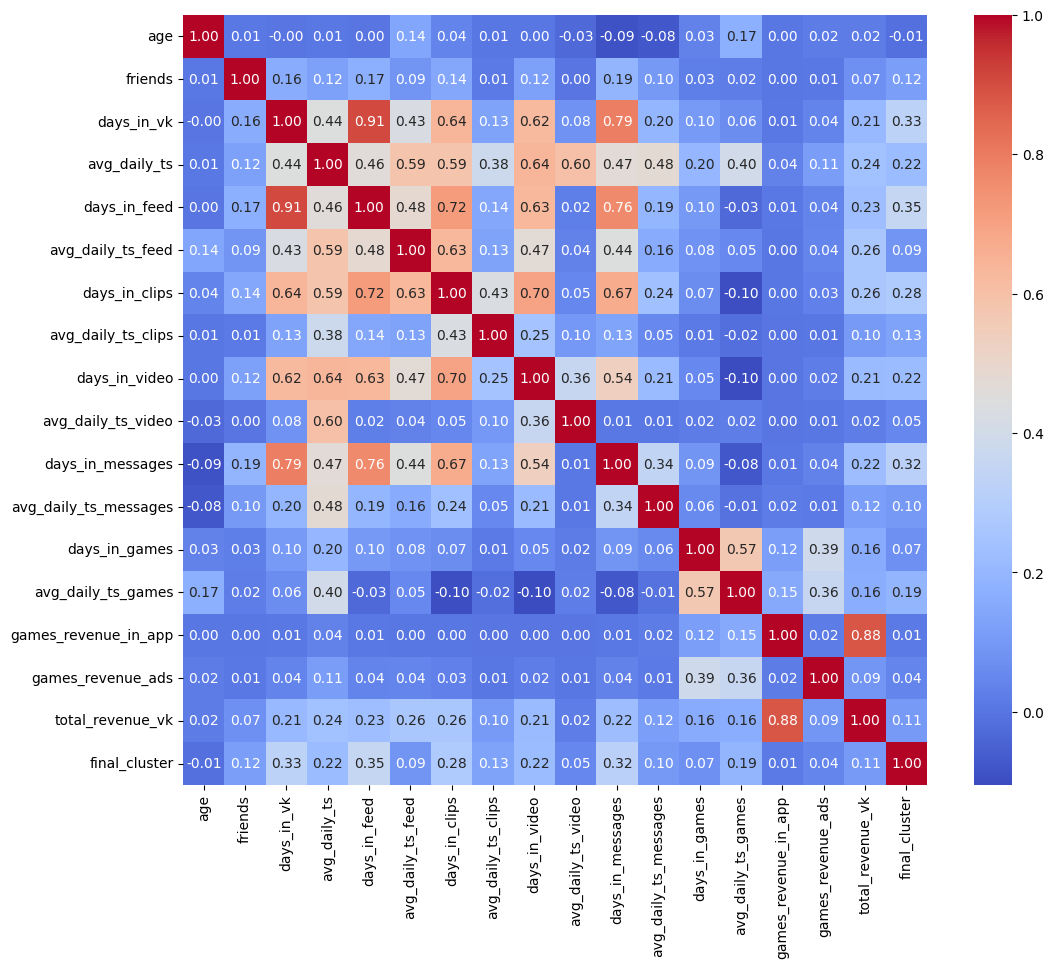

In [128]:
df_numeric = data.select_dtypes(include='number')
df_numeric = df_numeric.drop(columns=['sex', 'country_id', 'Unnamed: 0'], errors='ignore')
correlation_matrix = df_numeric.corr()



plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [5]:
df = filtered_df.copy()

In [108]:
# df['avg_daily_ts'].mean()
# df['friends'].mean()
df['avg_daily_ts_games'].mean() 


720.0223202057423

<Axes: >

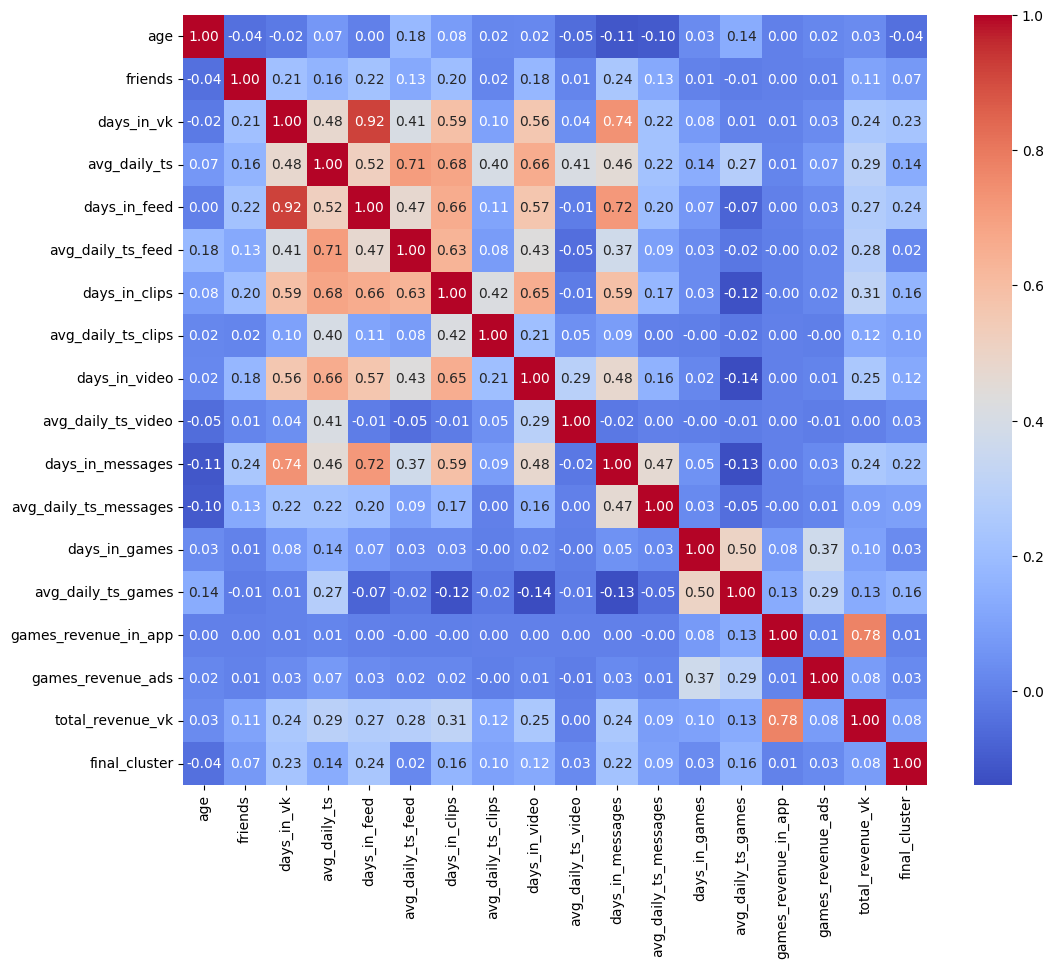

In [6]:
df_numeric = df.select_dtypes(include='number')
df_numeric = df_numeric.drop(columns=['sex', 'country_id', 'Unnamed: 0'], errors='ignore')
correlation_matrix = df_numeric.corr()



plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [8]:
hpTotalUsers = df.groupby(['heavy_vk_platform']).size()
hpTotalUsers = hpTotalUsers.reset_index(name='total_users')
hpTotalUsers.head()

,heavy_vk_platform,total_users
0,android,575775
1,android_clips,73
2,android_messenger,26345
3,android_tv,1058
4,dating_iphone_client,21


,heavy_vk_platform,days_in_games
0,android,193944
1,iphone,57302
2,web2,54775
3,mvk,4750
4,ipad_v2,196
5,vk_video_android,151
6,android_messenger,127
7,iphone_messenger,39
8,android_tv,22
9,vk_video_ios,21


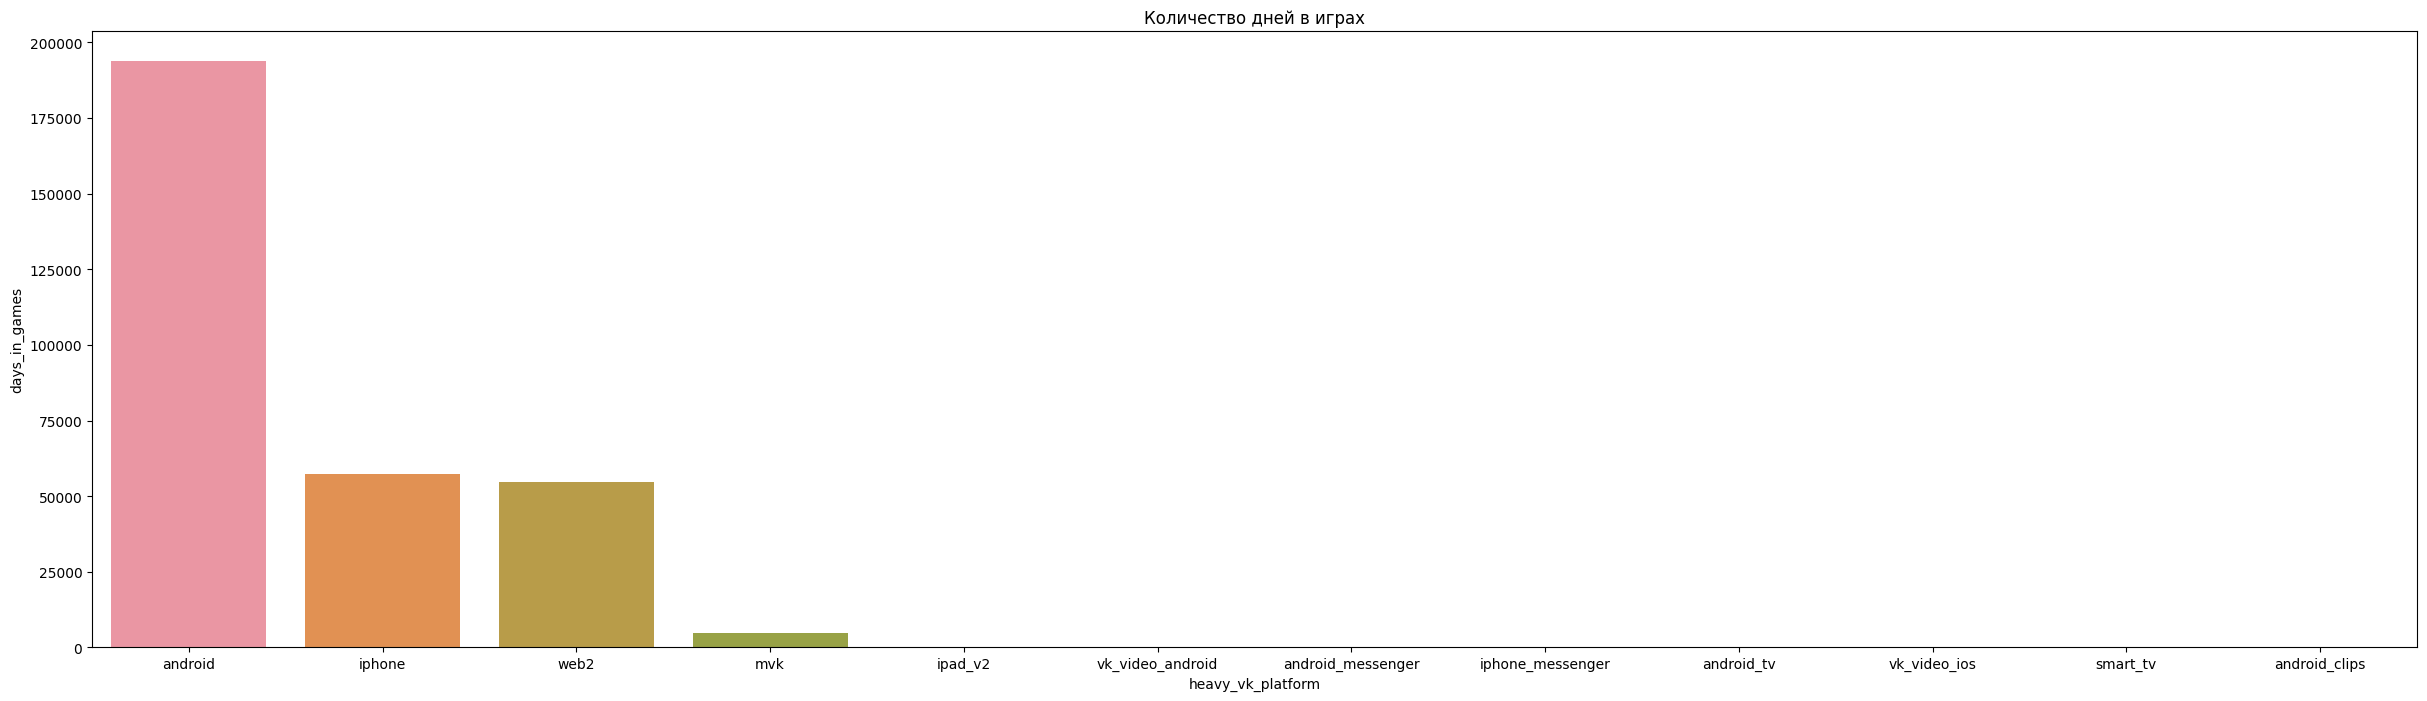

In [55]:

hp = df.groupby(['heavy_vk_platform'])['days_in_games'].sum().sort_values(ascending=False)
hp = hp.reset_index(name='days_in_games')
hp = hp.drop(np.where(hp['days_in_games'] == 0)[0])
plt.figure(figsize=(30,8))
plt.title("Количество дней в играх")
sns.barplot(x=hp['heavy_vk_platform'], y=hp['days_in_games'])
hp


Платформы и количество дней в играх в целом, вне зависимости от основной платформы пользователя

In [11]:
# platforms = df['vk_platforms_array'].apply(eval).explode()
# platform_counts = platforms.value_counts()

# plt.figure(figsize=(10,8))
# platform_counts.plot(kind='bar', color='blue')
# plt.title('Количество пользователей на каждой платформе ')
# plt.show()
# platform_counts

# Рассчитываем суммарное количество дней, проведенных на платформе (предполагается, что это сумма столбцов days_in_messages, days_in_games, days_in_clips)
total_days = filtered_df['days_in_messages'].sum() + filtered_df['days_in_games'].sum() + filtered_df['days_in_clips'].sum() +  filtered_df['days_in_video'].sum() +  filtered_df['days_in_feed'].sum() +  filtered_df['days_in_messages'].sum()

# Рассчитываем долю days_in_messages от total_days
ratio = filtered_df['days_in_messages'].sum() / total_days
# отношение дней проведенных пользователями в сообщениях ко всем дням проведенных пользователями на платформе
print(ratio)



0.21853619690514364


In [22]:
platform_counts
dd = df
dd.head()

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
0,0,1,34,2,53,android,"['web2', 'android', 'mvk', 'android_messenger'...",18,13240.403333,17,...,16,2062.786875,0,NaN,0.0,1.8209,14.099880,{},15,"['18+','Знакомства','Неоригинальный тематическ..."
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0,NaN,0.0,0.0000,0.000000,{},0,"['Мода','Неоригинальный тематический контент',..."
2,2,1,15,2,61,web2,"['web2', 'android']",30,1096.586000,25,...,30,951.446000,0,NaN,0.0,0.0000,0.371308,{},6,"['Некачественный контент','Неоригинальный конт..."
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0,NaN,0.0,0.0000,0.098684,{},12,[]
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,3,68.880000,0,NaN,0.0,0.0000,0.115412,{},22,"['Музыка','Неоригинальный тематический контент..."


In [6]:
dd['vk_platforms_array'] = df['vk_platforms_array'].apply(eval)
exploded_dd = dd.explode('vk_platforms_array')

# Группировка по платформам и суммирование дней в играх
platform_days_in_games = exploded_dd.groupby('vk_platforms_array')['days_in_games'].sum()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
platform_days_in_games.sort_values().plot(kind='bar', color='skyblue')
plt.title('Суммарное количество дней в играх на каждой платформе')
plt.xlabel('Платформа')
plt.ylabel('Сумма дней в играх')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

Отношение суммарного количество дней в играх на количество пользователей на платформе

<Axes: xlabel='vk_platforms_array'>

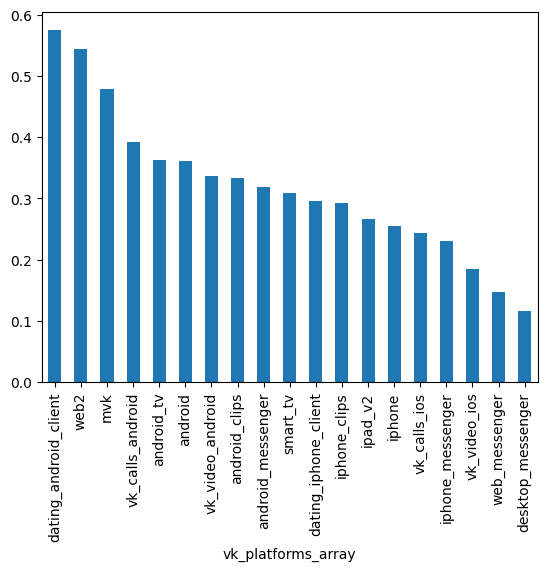

In [24]:
platforms_ratio = (platform_days_in_games / platform_counts).sort_values(ascending=False)
platforms_ratio 
platforms_ratio.plot(kind='bar')

Проверка гипотезы о том, что time spent в мессенджере и ленте слабо влияет на time spent в VK игры

In [137]:
df = data

# df['avg_daily_ts_messages'] = df['avg_daily_ts_messages'].fillna(df['avg_daily_ts_messages'].median())
# df['avg_daily_ts_games'] = df['avg_daily_ts_games'].fillna(df['avg_daily_ts_games'].median())
# df['avg_daily_ts'] = df['avg_daily_ts'].fillna(df['avg_daily_ts_messages'].median())
df['avg_daily_ts_feed'] = df['avg_daily_ts'].fillna(df['avg_daily_ts_messages'].median())

df['avg_daily_ts_games'] = df['avg_daily_ts_games'].fillna(df['avg_daily_ts_games'].median())

# Определение зависимой и независимой переменных
# X = df[['avg_daily_ts']]  # Независимая переменная
# X = df[['avg_daily_ts_messages']]
X = df[['avg_daily_ts_feed']]  # Независимая переменная


y = df['avg_daily_ts_games']       # Зависимая переменная

# Добавление константы для модели
X = sm.add_constant(X)

# Построение линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     avg_daily_ts_games   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 4.710e+04
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:26:56   Log-Likelihood:            -8.0945e+06
No. Observations:             1020898   AIC:                         1.619e+07
Df Residuals:                 1020896   BIC:                         1.619e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.7267      0.80

In [132]:
df = filtered_df

df['avg_daily_ts_messages'] = df['avg_daily_ts_messages'].fillna(df['avg_daily_ts_messages'].median())
df['avg_daily_ts_games'] = df['avg_daily_ts_games'].fillna(df['avg_daily_ts_games'].median())

# Определение зависимой и независимой переменных
X = df[['avg_daily_ts_messages']]  # Независимая переменная
y = df['avg_daily_ts_games']       # Зависимая переменная

# Добавление константы для модели
X = sm.add_constant(X)

# Построение линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     avg_daily_ts_games   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.74e-53
Time:                        15:24:16   Log-Likelihood:            -4.2342e+06
No. Observations:              578589   AIC:                         8.468e+06
Df Residuals:                  578587   BIC:                         8.468e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   110.24

In [5]:
filtered_df['revenue_games'] = filtered_df['games_revenue_ads'] + filtered_df['games_revenue_in_app']


corr = filtered_df['avg_daily_ts_games'].corr(filtered_df['revenue_games'])

mean_revenue = filtered_df['revenue_games'].mean()
std_revenue = filtered_df['revenue_games'].std()
std_avg_daily_ts_games = filtered_df['avg_daily_ts_games'].std()


delta_avg_daily_ts_games = (0.23 * mean_revenue) / (corr * std_revenue) * std_avg_daily_ts_games

print(f"Необходимое увеличение avg_daily_ts_games: {delta_avg_daily_ts_games}")

0.1497838225022535
Необходимое увеличение avg_daily_ts_games: 34.030392952294804


In [46]:
corr_fr_revGames = filtered_df['friends'].corr(filtered_df['days_in_messages'])
print(corr_fr_revGames)
                                   

0.24351578019717995
